In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV,Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import skew

# EDA and Data Cleaning

In [2]:
cars= pd.read_csv("Cars.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Price is the target variable and is being reindexed as the first column. 

In [4]:
cols = list(cars.columns)
cols[0], cols[25] = cols[25], cols[0]
cars=cars.reindex(columns=cols)
cars

,price,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_ID
0,13495.0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1
1,16500.0,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,2
2,16500.0,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,3
3,13950.0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,4
4,17450.0,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,201
201,19045.0,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,202
202,21485.0,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,203
203,22470.0,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,204


In [5]:
#checking for missing values 
round(100*cars.isna().sum()/205,3)

price               0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
car_ID              0.0
dtype: float64

No missing values hence data imputation wont be required. 

## Feature Selection through Correlation

In [6]:
print(cars)
print("Correlation Matrix")
corelation=cars.corr()
print()


       price  symboling                   CarName fueltype aspiration  \
0    13495.0          3        alfa-romero giulia      gas        std   
1    16500.0          3       alfa-romero stelvio      gas        std   
2    16500.0          1  alfa-romero Quadrifoglio      gas        std   
3    13950.0          2               audi 100 ls      gas        std   
4    17450.0          2                audi 100ls      gas        std   
..       ...        ...                       ...      ...        ...   
200  16845.0         -1           volvo 145e (sw)      gas        std   
201  19045.0         -1               volvo 144ea      gas      turbo   
202  21485.0         -1               volvo 244dl      gas        std   
203  22470.0         -1                 volvo 246   diesel      turbo   
204  22625.0         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          fr

In [7]:
treshold = 0.5
a=abs(corelation['price'])
result=a[a>treshold]
result

price         1.000000
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg       0.685751
highwaympg    0.697599
Name: price, dtype: float64

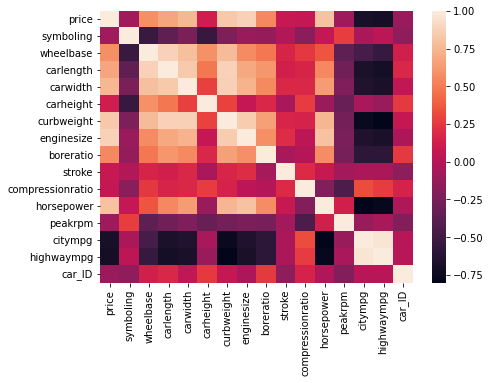

In [8]:
plt.figure(figsize=(7, 5)) 
corr_matrix = cars.corr()
sns.heatmap(corr_matrix)
plt.show()

Using these factors to build a model, creating a new dataset for ease of maneauvering. 

In [9]:
final_cars = cars[['price', 'wheelbase', 'enginesize', 'curbweight', 'carwidth', 'citympg', 'highwaympg', 'carlength', 'boreratio', 'horsepower']]
final_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       205 non-null    float64
 1   wheelbase   205 non-null    float64
 2   enginesize  205 non-null    int64  
 3   curbweight  205 non-null    int64  
 4   carwidth    205 non-null    float64
 5   citympg     205 non-null    int64  
 6   highwaympg  205 non-null    int64  
 7   carlength   205 non-null    float64
 8   boreratio   205 non-null    float64
 9   horsepower  205 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


In [10]:
final_cars = final_cars.astype(int)
final_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   price       205 non-null    int32
 1   wheelbase   205 non-null    int32
 2   enginesize  205 non-null    int32
 3   curbweight  205 non-null    int32
 4   carwidth    205 non-null    int32
 5   citympg     205 non-null    int32
 6   highwaympg  205 non-null    int32
 7   carlength   205 non-null    int32
 8   boreratio   205 non-null    int32
 9   horsepower  205 non-null    int32
dtypes: int32(10)
memory usage: 8.1 KB


# One-Hot Encoding
According to meta-data, 'boreratio' is the only one amonf the selecterd features that is categorical.  

In [11]:
final_cars = pd.get_dummies(final_cars, columns = ['boreratio'])
print(final_cars.columns)
final_cars.info()

Index(['price', 'wheelbase', 'enginesize', 'curbweight', 'carwidth', 'citympg',
       'highwaympg', 'carlength', 'horsepower', 'boreratio_2', 'boreratio_3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        205 non-null    int32
 1   wheelbase    205 non-null    int32
 2   enginesize   205 non-null    int32
 3   curbweight   205 non-null    int32
 4   carwidth     205 non-null    int32
 5   citympg      205 non-null    int32
 6   highwaympg   205 non-null    int32
 7   carlength    205 non-null    int32
 8   horsepower   205 non-null    int32
 9   boreratio_2  205 non-null    uint8
 10  boreratio_3  205 non-null    uint8
dtypes: int32(9), uint8(2)
memory usage: 7.7 KB


Data Normalization

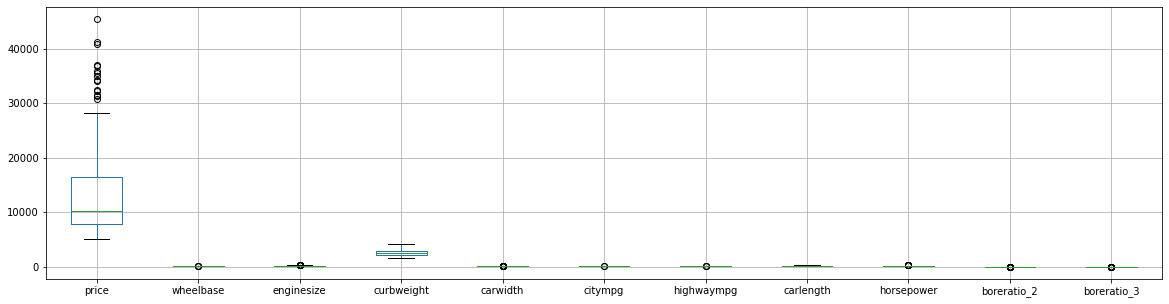

In [12]:
boxplot = final_cars.boxplot(figsize=(20,5), rot=0)

In [13]:
# splitting columns based on datatypes to work on each dataframe separately, objects and numerical colums will be grouped separately. 
col_num=['wheelbase', 'enginesize', 'curbweight', 'carwidth', 'citympg',
       'highwaympg', 'carlength', 'horsepower', 'boreratio_2', 'boreratio_3']
final_cars_normalized=final_cars[col_num]

In [14]:
# apply Z scale normalization techniques
for column in final_cars_normalized.columns:
   final_cars_normalized[column] = (final_cars_normalized[column] -
                           final_cars_normalized[column].mean()) / final_cars_normalized[column].std()    

display(final_cars_normalized.head())

<ipython-input-14-d67ced81d7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cars_normalized[column] = (final_cars_normalized[column] -
<ipython-input-14-d67ced81d7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cars_normalized[column] = (final_cars_normalized[column] -
<ipython-input-14-d67ced81d7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,wheelbase,enginesize,curbweight,carwidth,citympg,highwaympg,carlength,horsepower,boreratio_2,boreratio_3
0,-1.697542,0.074267,-0.014531,-0.654245,-0.644974,-0.544725,-0.453323,0.174057,-0.354623,0.354623
1,-1.697542,0.074267,-0.014531,-0.654245,-0.644974,-0.544725,-0.453323,0.174057,-0.354623,0.354623
2,-0.708449,0.602571,0.513625,-0.191762,-0.950684,-0.689938,-0.208553,1.261448,2.806144,-2.806144
3,0.115796,-0.430023,-0.419770,0.270722,-0.186409,-0.109087,0.199399,-0.053537,-0.354623,0.354623
4,0.115796,0.218350,0.515545,0.270722,-1.103540,-1.270789,0.199399,0.275209,-0.354623,0.354623


In [15]:
cars_price_prediction=pd.concat([final_cars['price'],final_cars_normalized],axis=1)
cars_price_prediction.head(5)

,price,wheelbase,enginesize,curbweight,carwidth,citympg,highwaympg,carlength,horsepower,boreratio_2,boreratio_3
0,13495,-1.697542,0.074267,-0.014531,-0.654245,-0.644974,-0.544725,-0.453323,0.174057,-0.354623,0.354623
1,16500,-1.697542,0.074267,-0.014531,-0.654245,-0.644974,-0.544725,-0.453323,0.174057,-0.354623,0.354623
2,16500,-0.708449,0.602571,0.513625,-0.191762,-0.950684,-0.689938,-0.208553,1.261448,2.806144,-2.806144
3,13950,0.115796,-0.430023,-0.419770,0.270722,-0.186409,-0.109087,0.199399,-0.053537,-0.354623,0.354623
4,17450,0.115796,0.218350,0.515545,0.270722,-1.103540,-1.270789,0.199399,0.275209,-0.354623,0.354623


## Ridge Regression- Data Preparation

In [16]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adjusted R2','MAE','MAPE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(2)
    
    # Create Adjusted R2
    Adj_r2 = 1 - (1-r2) * (len(X)-1)/(len(X)-(len(predictors)-1))
        
    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(2)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(2)*100
    
    # Create MSE
   # mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(2)
    
    train_metrics = [r2, Adj_r2, mae, mape]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(2),
                    1 - (1-r2) * (len(X)-1)/(len(X)-(len(predictors)-1)),
                    mean_absolute_error(y_test,y_hat).round(2),
                    mean_absolute_percentage_error(y_test,y_hat).round(2)*100]
                    #(mean_squared_error(y_test,y_hat)*len(y_test)).round(2)
                   
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
   
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')
    return test_metrics

In [17]:
predictors = ['wheelbase', 'enginesize', 'curbweight', 'carwidth', 'citympg', 'highwaympg', 'carlength', 'boreratio_2', 'boreratio_3','horsepower']
X = cars_price_prediction[predictors]
y = cars_price_prediction["price"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=45)

model1 = Ridge(normalize=True)
model1.fit(X_train,y_train)

RR=train_test_metrics(X_train,X_test,y_train,y_test,model1)

multiple = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model1.coef_.round(3)})
multiple

     Predictor  coefficent
0    wheelbase     447.610
1   enginesize    1513.571
2   curbweight    1031.277
3     carwidth     847.419
4      citympg    -573.842
5   highwaympg    -487.698
6    carlength     540.083
7  boreratio_2      76.889
8  boreratio_3     -76.889
9   horsepower    1292.827


                   Train         Test
R2              0.760000     0.750000
Adjusted R2     0.750204     0.750204
MAE          2619.540000  2700.560000
MAPE           19.000000    21.000000




,Predictor,coefficent
0,wheelbase,447.610
1,enginesize,1513.571
2,curbweight,1031.277
3,carwidth,847.419
4,citympg,-573.842
5,highwaympg,-487.698
6,carlength,540.083
7,boreratio_2,76.889
8,boreratio_3,-76.889
9,horsepower,1292.827


In [18]:
predictors = ['wheelbase', 'enginesize', 'curbweight', 'carwidth', 'citympg', 'highwaympg', 'carlength', 'boreratio_2', 'boreratio_3','horsepower']
X = cars_price_prediction[predictors]
y = cars_price_prediction['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas,normalize=True)
model.fit(X_train,y_train)

RRCV=train_test_metrics(X_train,X_test,y_train,y_test,model)

     Predictor  coefficent
0    wheelbase     168.742
1   enginesize    3167.259
2   curbweight    1303.807
3     carwidth    1312.276
4      citympg    -468.381
5   highwaympg      -5.260
6    carlength    -295.302
7  boreratio_2     123.484
8  boreratio_3    -123.484
9   horsepower    1731.585


                   Train         Test
R2              0.820000     0.810000
Adjusted R2     0.812653     0.812653
MAE          2410.170000  2390.010000
MAPE           18.000000    20.000000




In [19]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [20]:
ridge_coef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)})
ridge_coef

,Predictor,coefficent
0,wheelbase,168.742
1,enginesize,3167.259
2,curbweight,1303.807
3,carwidth,1312.276
4,citympg,-468.381
5,highwaympg,-5.260
6,carlength,-295.302
7,boreratio_2,123.484
8,boreratio_3,-123.484
9,horsepower,1731.585


## Lasso Regression

In [21]:
from scipy import stats

In [22]:
#predictors1 = ['horsepower', 'enginesize', 'curbweight', 'carwidth', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd']
#X = cars_price_prediction[predictors]
#y = cars_price_prediction["price"]

#X_train,X_test,y_train,y_test = train_test_split(X,stats.boxcox(y,lmbda=0.5),test_size=0.2,random_state=90)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

lac = LassoCV(alphas=r_alphas,normalize=True)
lac.fit(X_train,y_train)

LR=train_test_metrics(X_train,X_test,y_train,y_test,lac)
LR

     Predictor  coefficent
0    wheelbase     427.322
1   enginesize    3799.334
2   curbweight    1387.207
3     carwidth    1489.291
4      citympg   -1296.257
5   highwaympg     855.803
6    carlength    -993.749
7  boreratio_2     207.906
8  boreratio_3      -0.000
9   horsepower    1450.531


                   Train         Test
R2              0.820000     0.810000
Adjusted R2     0.812653     0.812653
MAE          2407.330000  2429.580000
MAPE           18.000000    20.000000




,Test
R2,0.810000
Adjusted R2,0.812653
MAE,2429.580000
MAPE,20.000000


In [23]:
corrolacoef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':lac.coef_.round(3)})
corrolacoef

,Predictor,coefficent
0,wheelbase,427.322
1,enginesize,3799.334
2,curbweight,1387.207
3,carwidth,1489.291
4,citympg,-1296.257
5,highwaympg,855.803
6,carlength,-993.749
7,boreratio_2,207.906
8,boreratio_3,-0.000
9,horsepower,1450.531


# Random Forest

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

#Create an instance of Random Forest Classifier
forest = RandomForestRegressor(n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
# Fit the model
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, n_jobs=2, random_state=1)

# Measure model performance
y_pred = forest.predict(X_test)
errors=abs(y_pred-y_test)
mape=100*(errors/ y_test)
accuracy = 100-np.mean(mape)
print('Accuracy:',round(accuracy,2), '%')

In [25]:
def train_test_metrics_rf(X_train,X_test,y_train,y_test,model):
    names=['R2','Adjusted R2','MAE','MAPE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(2)
    
    # Create Adjusted R2
    Adj_r2 = 1 - (1-r2) * (len(X)-1)/(len(X)-(len(predictors)-1))
        
    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(2)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(2)*100
    
    # Create MSE
   # mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(2)
    
    train_metrics = [r2, Adj_r2, mae, mape]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(2),
                    1 - (1-r2) * (len(X)-1)/(len(X)-(len(predictors)-1)),
                    mean_absolute_error(y_test,y_hat).round(2),
                    mean_absolute_percentage_error(y_test,y_hat).round(2)*100]
                    #(mean_squared_error(y_test,y_hat)*len(y_test)).round(2)
                   
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
   
    print('\n')
    print(all_metrics)
    print('\n')
    return test_metrics

In [26]:
RF=train_test_metrics_rf(X_train,X_test,y_train,y_test,forest)



                  Train         Test
R2             0.980000     0.930000
Adjusted R2    0.979184     0.979184
MAE          738.980000  1528.790000
MAPE           6.000000    12.000000




In [27]:
det = pd.concat([RF, RR, RRCV, LR], join = 'outer', axis = 1)

In [28]:
det.columns=['Random Forest','Ridge Regression','Ridge Regression CV','Lasso Regression']
det

,Random Forest,Ridge Regression,Ridge Regression CV,Lasso Regression
R2,0.930000,0.750000,0.810000,0.810000
Adjusted R2,0.979184,0.750204,0.812653,0.812653
MAE,1528.790000,2700.560000,2390.010000,2429.580000
MAPE,12.000000,21.000000,20.000000,20.000000
